In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Base_Dados = pd.read_csv('/content/unicorns till sep 2022.csv')

Base_Dados.shape

(1186, 7)

In [ ]:
Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
Base_Dados.rename( columns=
 {
   'Company': 'Empresa',
   'Valuation ($B)': 'Valor ($)',
   'Date Joined': 'Data de Adesão',
   'Country': 'Pais',
   'City': 'Cidade',
   'Industry': 'Setor',
   'Investors': 'Investidores',
 }, inplace=True
 )

In [ ]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor ($)       1186 non-null   object
 2   Data de Adesão  1186 non-null   object
 3   Pais            1186 non-null   object
 4   City            1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investidores    1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [ ]:
Base_Dados.isnull().sum()

,0
Empresa,0
Valor ($),0
Data de Adesão,0
Pais,0
City,0
Setor,0
Investidores,18


In [ ]:
Base_Dados.nunique()

,0
Empresa,1183
Valor ($),222
Data de Adesão,695
Pais,48
City,286
Setor,34
Investidores,1152


In [ ]:
Base_Dados['Setor'].value_counts()

,count
Setor,
Fintech,239
Internet software & services,224
E-commerce & direct-to-consumer,103
Health,94
Artificial intelligence,74
Other,65
"Supply chain, logistics, & delivery",65
Cybersecurity,58
Data management & analytics,45


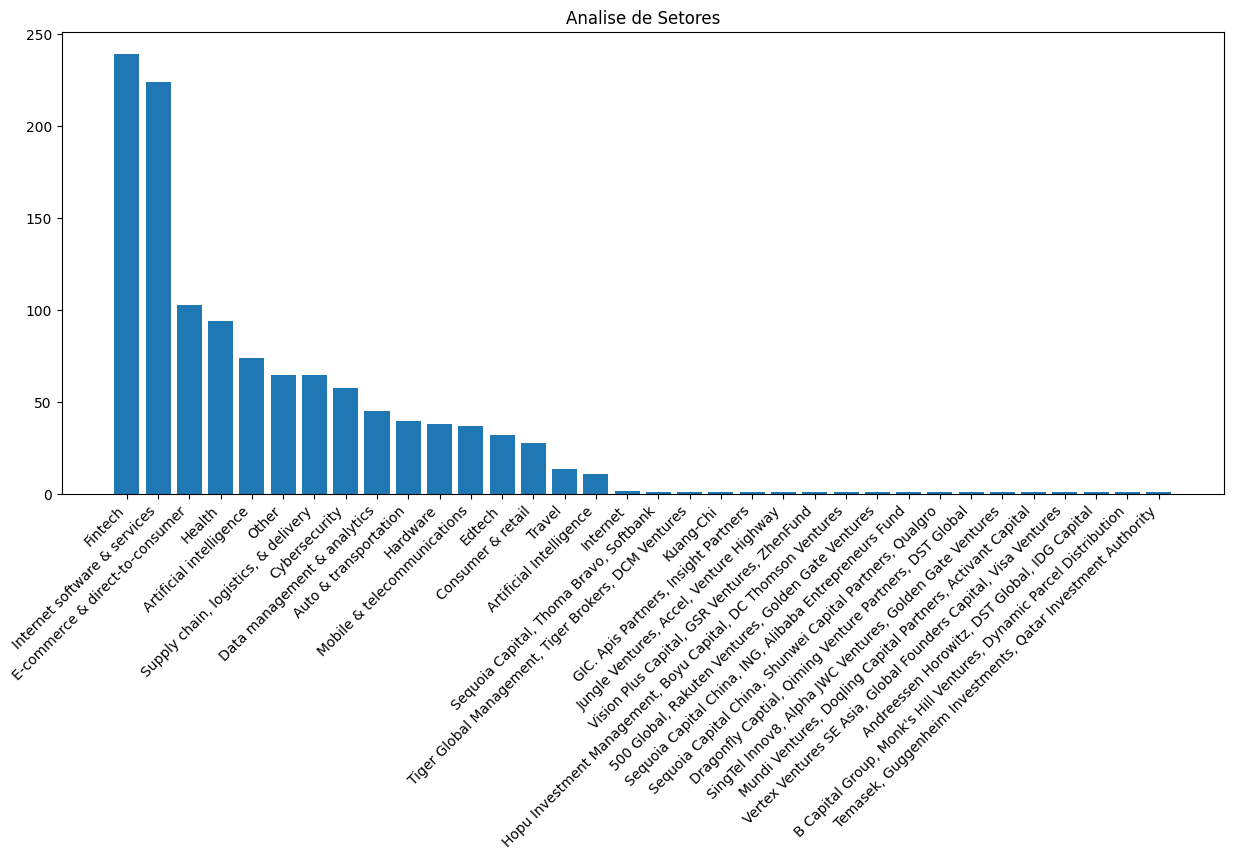

In [33]:
plt.figure(figsize=(15, 6))
plt.title('Analise de Setores')
plt.bar(Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts())
plt.xticks( rotation=45, ha='right');

In [26]:
Analise = round (Base_Dados['Pais'].value_counts(normalize=True) * 100, 1)

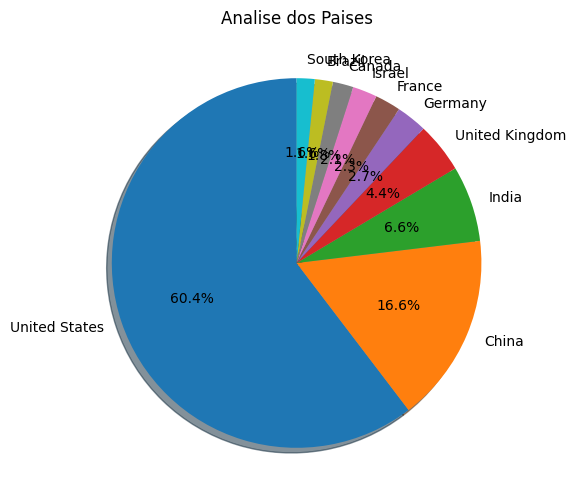

In [39]:
plt.figure(figsize=(15, 6))
plt.title('Analise dos Paises')
plt.pie(
    Analise.head(10),
    labels= Analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [36]:
Base_Dados['Data de Adesão'] = pd.to_datetime( Base_Dados['Data de Adesão'])

Base_Dados['Data de Adesão'].head()

,Data de Adesão
0,2017-04-07
1,2012-12-01
2,2018-07-03
3,2014-01-23
4,2018-01-08


In [46]:
Base_Dados['Mes'] = pd.DatetimeIndex( Base_Dados['Data de Adesão']).month
Base_Dados['Ano'] = pd.DatetimeIndex( Base_Dados['Data de Adesão']).year

Base_Dados.head()

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investidores,Mes,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [53]:
Analise_Agrupada = ( Base_Dados.groupby( by=['Pais', 'Ano', 'Mes', 'Empresa']).count().reset_index() )

In [54]:
Analise_Agrupada.loc[
    Analise_Agrupada ['Pais'] == 'Brazil'
].reset_index()

,index,Pais,Ano,Mes,Empresa,Valor ($),Data de Adesão,City,Setor,Investidores
0,16,Brazil,2018,7,Movile,1,1,1,1,1
1,17,Brazil,2018,11,iFood,1,1,1,1,1
2,18,Brazil,2019,6,Loggi,1,1,1,1,1
3,19,Brazil,2019,9,QuintoAndar,1,1,1,1,1
4,20,Brazil,2019,10,EBANX,1,1,1,1,1
5,21,Brazil,2019,12,Wildlife Studios,1,1,1,1,1
6,22,Brazil,2020,1,Loft,1,1,1,1,1
7,23,Brazil,2020,12,C6 Bank,1,1,1,1,1
8,24,Brazil,2020,12,Creditas,1,1,1,1,1
9,25,Brazil,2021,1,MadeiraMadeira,1,1,1,1,1


In [70]:
Base_Dados['Valor ($)'] = pd.to_numeric(Base_Dados['Valor ($)'].astype(str).str.replace('$', ''), errors='coerce')

Base_Dados.head()

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investidores,Mes,Ano
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [80]:
Analise_Pais = Base_Dados.groupby (by=['Pais']).agg({'Valor ($)': 'sum'}).reset_index().sort_values('Valor ($)', ascending = False)

Analise_Pais.head(10).reset_index()

,index,Pais,Valor ($)
0,46,United States,2069.89
1,9,China,678.59
2,45,United Kingdom,205.45
3,20,India,202.92
4,18,Germany,80.88
5,17,France,58.42
6,1,Australia,54.40
7,7,Canada,49.23
8,23,Israel,48.02
9,6,Brazil,40.08


In [82]:
Analise_Valor = Analise_Pais.sort_values('Valor ($)', ascending=False)

Analise_Valor.head(10).reset_index()

,index,Pais,Valor ($)
0,46,United States,2069.89
1,9,China,678.59
2,45,United Kingdom,205.45
3,20,India,202.92
4,18,Germany,80.88
5,17,France,58.42
6,1,Australia,54.40
7,7,Canada,49.23
8,23,Israel,48.02
9,6,Brazil,40.08


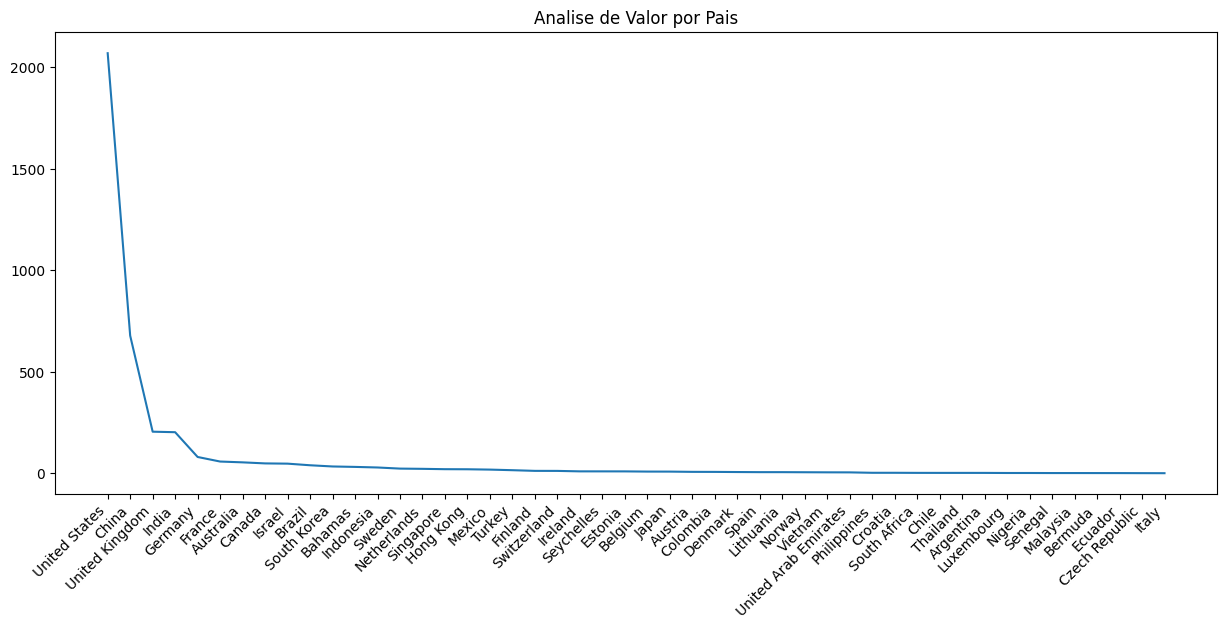

In [86]:
plt.figure(figsize=(15, 6))
plt.title('Analise de Valor por Pais')
plt.plot (Analise_Valor['Pais'], Analise_Valor['Valor ($)'])
plt.xticks( rotation=45, ha='right');